In [1]:
import pandas as pd
import numpy as np
import datetime
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
import os
from tensorflow import keras
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

# Load Reddit comments

In [2]:
li = []
df1 = pd.read_csv('bitcoin2020-01.csv')
li.append(df1)
df2 = pd.read_csv('bitcoin2020-02.csv')
li.append(df2)
df3 = pd.read_csv('bitcoin2020-03.csv')
li.append(df3)
df4 = pd.read_csv('bitcoin2020-04.csv')
li.append(df4)
df5 = pd.read_csv('bitcoin2020-05.csv')
li.append(df5)
df6 = pd.read_csv('bitcoin2020-06.csv')
li.append(df6)
df7 = pd.read_csv('bitcoin2020-07.csv')
li.append(df7)
df8 = pd.read_csv('bitcoin2020-08.csv')
li.append(df8)
df9 = pd.read_csv('bitcoin2020-09.csv')
li.append(df9)
df10 = pd.read_csv('bitcoin2020-10.csv')
li.append(df10)
df11 = pd.read_csv('bitcoin2020-11.csv')
li.append(df11)
df12 = pd.read_csv('bitcoin2020-12.csv')
li.append(df12)
df13 = pd.read_csv('bitcoin2021-01.csv')
li.append(df13)
df14 = pd.read_csv('bitcoin2021-02.csv')
li.append(df14)
df15 = pd.read_csv('bitcoin2021-03.csv')
li.append(df15)
df16 = pd.read_csv('bitcoin2021-04.csv')
li.append(df16)
df17 = pd.read_csv('bitcoin2021-05.csv')
li.append(df17)
df18 = pd.read_csv('bitcoin2021-06.csv')
li.append(df18)

df = pd.concat(li, axis=0, ignore_index=True)

c:\users\emaibach\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df = df[df["score"] > 3].copy()

In [4]:
df

,author_premium,body,controversiality,created_utc,distinguished,id,locked,no_follow,parent_id,quarantined,removal_reason,retrieved_on,score,subreddit
2,False,I'm going to be straight up. Bitcoin is not fo...,0,1577836840,NaN,fconqr1,False,True,t1_fcon879,False,NaN,1586450311,6,Bitcoin
4,False,Those people calling the eth ecosystem a scam ...,0,1577836857,NaN,fconrjz,False,True,t1_fcocflo,False,NaN,1586450321,9,omise_go
6,False,"""Dave, This is not gonna work. Look I just exp...",0,1577836880,NaN,fconsqr,False,False,t3_ei481h,False,NaN,1586450339,4,Bitcoin
11,False,Ctrl+C Ctrl+V\n\n[https://www.tradingview.com/...,0,1577836907,NaN,fconu23,False,False,t3_ehxjr0,False,NaN,1586450358,5,BitcoinMarkets
12,False,Nice how do you like the size? I can’t decide ...,0,1577836915,NaN,fconuf9,False,True,t1_fcoloeq,False,NaN,1586450363,9,ipad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6536938,False,Yes it is,0,1625097507,NaN,h3mfplc,False,False,t1_h3mamum,False,NaN,0,7,CryptoCurrency
6536940,False,&gt;so what stops any wallet provider from doi...,0,1625097513,NaN,h3mfq1a,False,False,t3_ob7xhi,False,NaN,0,4,lightningnetwork
6536941,False,No it’s not,0,1625097514,NaN,h3mfq41,False,False,t1_h3mane6,False,NaN,0,6,CryptoCurrency
6536951,False,"I could maybe see it reach .25 - .33, depends ...",0,1625097559,NaN,h3mft8y,False,True,t3_ob64x6,False,NaN,0,6,Ankrofficial


In [5]:
df["created_utc"] = pd.to_datetime(df["created_utc"],unit='s')

In [6]:
df["retrieved_on"] = pd.to_datetime(df["retrieved_on"],unit='s')

In [7]:
df = df[df['body'] != "[removed]"]

In [8]:
df = df[df['body'] != "[deleted]"]

In [9]:
df["created_utc"] = pd.to_datetime(df["created_utc"].dt.date)

In [10]:
df["body"] = df["body"].astype(str)

In [11]:
df = df[df['body'].isna() == False]

In [12]:
df['body'] = df['body'].str.lower()

# Group Comments By Day And Do Bag Of Words Counts

In [13]:
dfbyday = df[["created_utc","id","author_premium","controversiality", "locked", "no_follow", "score", "body"]].groupby(["created_utc"]).agg({"id": ["count"], "author_premium": ["sum"], "controversiality": ["sum"], "locked" : ["sum"], "no_follow" : ["sum"], "score" : [np.mean], "body": ' '.join})

In [14]:
dfbyday = dfbyday.droplevel(axis=1, level=0).reset_index().set_axis(["Date", "CommentCount", "PremiumCount", "Controversiality", "LockedCount", "FollowCount", "Score", "Body"], axis=1, inplace=False)

In [15]:
vectorizer = CountVectorizer(min_df=0.10, max_df=0.90, ngram_range=(1,3))

In [16]:
wordvector = vectorizer.fit_transform(dfbyday['Body'])

In [17]:
wordvectordf = pd.DataFrame(wordvector.todense(), columns=vectorizer.get_feature_names_out())

In [18]:
dfbydayvector = pd.concat([dfbyday[["Date"]], wordvectordf], axis=1)

# Load BitCoin price history

In [19]:
dfprice = pd.read_csv('bitcoinprice2020-21.csv')

In [20]:
dfprice["Date"] = pd.to_datetime(dfprice["Date"], infer_datetime_format=True)  

In [21]:
dfprice["Change %"] = dfprice["Change %"].str.rstrip('%').astype('float') / 100.0

In [22]:
dfprice["NextDayChange"] = dfprice["Change %"].shift(-1)

In [23]:
dfvectorprice = pd.merge(dfbydayvector, dfprice[["Date", "NextDayChange"]], left_on="Date", right_on="Date", how="outer")

In [24]:
dfvectorprice = dfvectorprice[dfvectorprice['00'].isna() == False].copy()

In [25]:
conditions = [
               (dfvectorprice["NextDayChange"] <= -0.025), 
               (dfvectorprice["NextDayChange"] > -0.025) & (dfvectorprice["NextDayChange"] < 0.025),
               (dfvectorprice["NextDayChange"] >= 0.025)
             ]
values = [0, 1, 2]
dfvectorprice['ChangeGroup'] = np.select(conditions, values)

In [26]:
dfvectorprice = dfvectorprice.drop(['NextDayChange', 'Date'], axis=1)

# Scale The Data

In [27]:
scaler = MinMaxScaler()

In [28]:
dfvectorprice.loc[:, dfvectorprice.columns != 'ChangeGroup'] = scaler.fit_transform(dfvectorprice.loc[:, dfvectorprice.columns != 'ChangeGroup'] )

# Create Train, Test, and Validation data sets

In [29]:
dfvectorprice_train, dfvectorprice_test = train_test_split(dfvectorprice, test_size=0.4)

In [30]:
dfvectorprice_test, dfvectorprice_valid = train_test_split(dfvectorprice_test, test_size=0.5)

In [31]:
X_train = dfvectorprice_train.drop(['ChangeGroup'], axis=1).to_numpy()

In [32]:
y_train = dfvectorprice_train[["ChangeGroup"]].to_numpy()

In [33]:
X_test = dfvectorprice_test.drop(['ChangeGroup'], axis=1).to_numpy()

In [34]:
y_test = dfvectorprice_test[["ChangeGroup"]].to_numpy()

In [35]:
X_valid = dfvectorprice_valid.drop(['ChangeGroup'], axis=1).to_numpy()

In [36]:
y_valid = dfvectorprice_valid[["ChangeGroup"]].to_numpy()

# Analyze

In [37]:
cgdf = dfvectorprice_train[["ChangeGroup"]].copy()

In [38]:
cgdf["Change Group"] = ""

In [39]:
cgdf.loc[cgdf['ChangeGroup'] == 0, 'Change Group'] = "Decrease"
cgdf.loc[cgdf['ChangeGroup'] == 1, 'Change Group'] = "No Change"
cgdf.loc[cgdf['ChangeGroup'] == 2, 'Change Group'] = "Increase"

Text(0, 0.5, '')

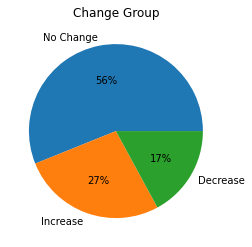

In [40]:
ax = cgdf["Change Group"].value_counts().plot.pie(autopct='%1.0f%%', title="Change Group", legend=False)
ax.set_ylabel('')

# Find 20 Best Words For Predicting Price

In [41]:
seletbest = SelectKBest(k=20).fit(X_train, y_train.ravel())

In [42]:
X_trainnew = seletbest.transform(X_train)

In [43]:
X_testnew = seletbest.transform(X_test)

In [44]:
X_validnew = seletbest.transform(X_valid)

# Build Neural Network

In [45]:
root_logdir = os.path.join(os.curdir, "tensor_logs")
def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [46]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=[20,]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(3, activation="softmax"))

In [47]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [48]:
run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_trainnew, y_train, epochs=30, validation_data=(X_validnew, y_valid), callbacks=[tensorboard_cb])

Epoch 1/30
11/11 [==============================] - 1s 41ms/step - loss: 1.0949 - accuracy: 0.3445 - val_loss: 1.0912 - val_accuracy: 0.4818
Epoch 2/30
11/11 [==============================] - 0s 5ms/step - loss: 1.0771 - accuracy: 0.5305 - val_loss: 1.0649 - val_accuracy: 0.6909
Epoch 3/30
11/11 [==============================] - 0s 5ms/step - loss: 1.0606 - accuracy: 0.5976 - val_loss: 1.0432 - val_accuracy: 0.7000
Epoch 4/30
11/11 [==============================] - 0s 5ms/step - loss: 1.0470 - accuracy: 0.5884 - val_loss: 1.0236 - val_accuracy: 0.7091
Epoch 5/30
11/11 [==============================] - 0s 7ms/step - loss: 1.0353 - accuracy: 0.5732 - val_loss: 1.0013 - val_accuracy: 0.7091
Epoch 6/30
11/11 [==============================] - 0s 4ms/step - loss: 1.0230 - accuracy: 0.5640 - val_loss: 0.9832 - val_accuracy: 0.7182
Epoch 7/30
11/11 [==============================] - 0s 4ms/step - loss: 1.0125 - accuracy: 0.5610 - val_loss: 0.9662 - val_accuracy: 0.7182
Epoch 8/30
11/11 [=

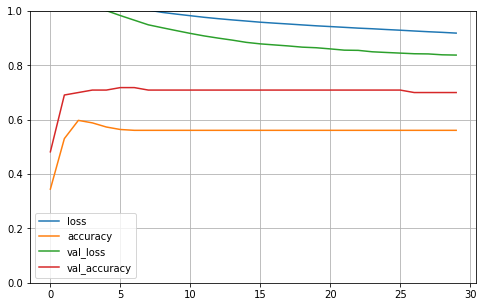

In [49]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [50]:
model.evaluate(X_testnew, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.8831 - accuracy: 0.6697


[0.8831192255020142, 0.6697247624397278]

In [51]:
y_proba = model.predict(X_testnew)
indexes = tf.argmax(y_proba, axis=1)
indexes

<tf.Tensor: shape=(109,), dtype=int64, numpy=
array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)>

In [52]:
resultdf = pd.DataFrame(indexes)
resultdf["Change Group"] = "Unknown"
resultdf.loc[resultdf[0] == 0, 'Change Group'] = "Decrease"
resultdf.loc[resultdf[0] == 1, 'Change Group'] = "No Change"
resultdf.loc[resultdf[0] == 2, 'Change Group'] = "Increase"

Text(0, 0.5, '')

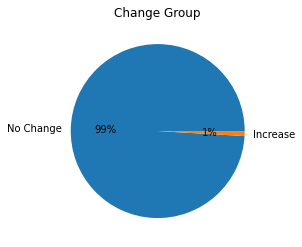

In [53]:
ax = resultdf["Change Group"].value_counts().plot.pie(autopct='%1.0f%%', title="Change Group", legend=False)
ax.set_ylabel('')

In [99]:
seletbest = SelectKBest(k=5).fit(X_train, y_train.ravel())

c:\users\emaibach\appdata\local\programs\python\python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [    14     26     29 ... 762260 762291 762302] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\users\emaibach\appdata\local\programs\python\python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [100]:
X_trainnew = seletbest.transform(X_train)

In [101]:
X_testnew = seletbest.transform(X_test)

In [102]:
X_validnew = seletbest.transform(X_valid)

In [106]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=[5,]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(3, activation="softmax"))

In [107]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [108]:
run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_trainnew, y_train, epochs=30, validation_data=(X_validnew, y_valid), callbacks=[tensorboard_cb])

Epoch 1/30
4/4 [==============================] - 1s 183ms/step - loss: 1.0756 - accuracy: 0.3333 - val_loss: 1.0866 - val_accuracy: 0.3784
Epoch 2/30
4/4 [==============================] - 0s 9ms/step - loss: 1.0638 - accuracy: 0.3333 - val_loss: 1.0839 - val_accuracy: 0.4054
Epoch 3/30
4/4 [==============================] - 0s 10ms/step - loss: 1.0543 - accuracy: 0.4167 - val_loss: 1.0806 - val_accuracy: 0.4595
Epoch 4/30
4/4 [==============================] - 0s 10ms/step - loss: 1.0453 - accuracy: 0.5000 - val_loss: 1.0788 - val_accuracy: 0.4595
Epoch 5/30
4/4 [==============================] - 0s 9ms/step - loss: 1.0371 - accuracy: 0.5185 - val_loss: 1.0778 - val_accuracy: 0.3784
Epoch 6/30
4/4 [==============================] - 0s 9ms/step - loss: 1.0306 - accuracy: 0.5278 - val_loss: 1.0772 - val_accuracy: 0.3784
Epoch 7/30
4/4 [==============================] - 0s 9ms/step - loss: 1.0235 - accuracy: 0.5278 - val_loss: 1.0758 - val_accuracy: 0.3514
Epoch 8/30
4/4 [==============

In [98]:
model.evaluate(X_testnew, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 1.0000 - accuracy: 0.5000


[0.999980628490448, 0.5]